<a href="https://colab.research.google.com/github/nalyzhang/MO/blob/main/lab2_2373_Panina_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install -q kaggle

In [6]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nalyzhang","key":"ba24fba2eeab9f621e8d2840dd5e8f3d"}'}

In [7]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                       Student Performance Factors                          94KB  2024-09-02 10:53:57          35348        626  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset   Mobile Device Usage and User Behavior Dataset        11KB  2024-09-28 20:21:12           7109        126  1.0              
mohamedyosef101/2024-olympics-medals-and-economic-status      2024 Olympics Medals and Economic status              2KB  2024-10-13 12:39:58           1493         22  1.0              
abdulszz/spotify-most-streamed-songs                          Spotify 

In [30]:
! kaggle datasets download -d owm4096/laptop-prices

Dataset URL: https://www.kaggle.com/datasets/owm4096/laptop-prices
License(s): other
  0% 0.00/25.2k [00:00<?, ?B/s]
100% 25.2k/25.2k [00:00<00:00, 28.9MB/s]


In [31]:
! unzip "laptop-prices.zip"

Archive:  laptop-prices.zip
  inflating: laptop_prices.csv       


In [32]:
import pandas as pd

df = pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


1. Добавим новый атрибут "Price_rub", который будет показывать цену лаптопа в рублях. Текущий курс (18.10.24) - 104.86

In [45]:
df['Price_rub'] = df.apply(lambda x: x['Price_euros'] * 104.86, axis=1)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_rub
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,140479.8934
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,94262.8484
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,60294.5000
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,266077.0070
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,189125.4960


2. Удалим выбросы и дубли, обработаем пропущенные значения

In [46]:
duplicate = df[df.duplicated()]
duplicate.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_rub


Дублей в датасете нет

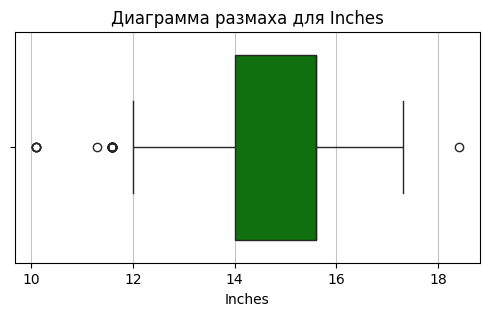

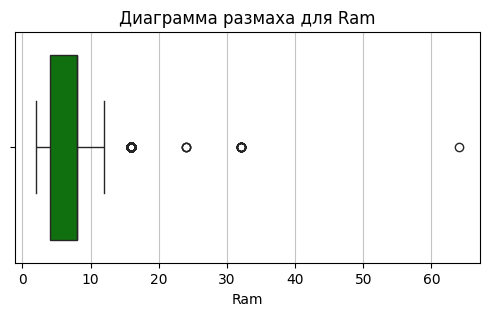

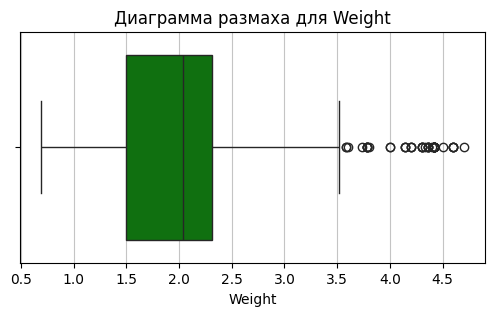

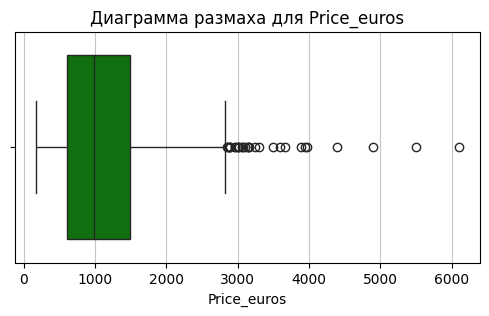

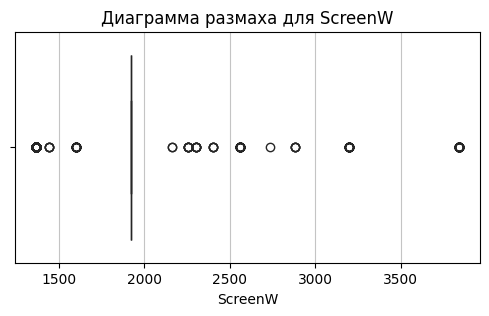

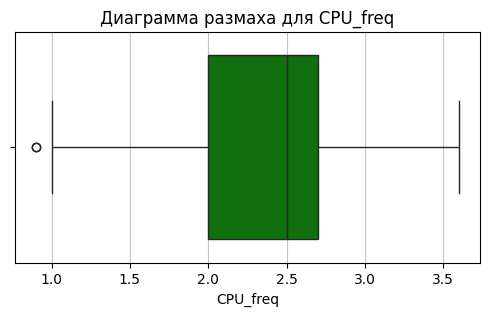

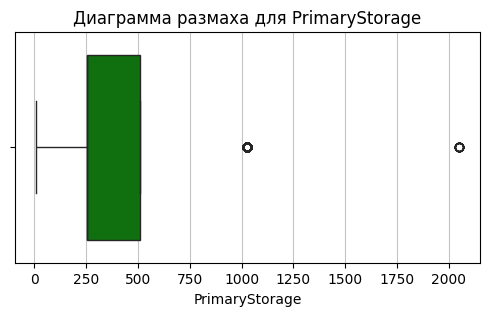

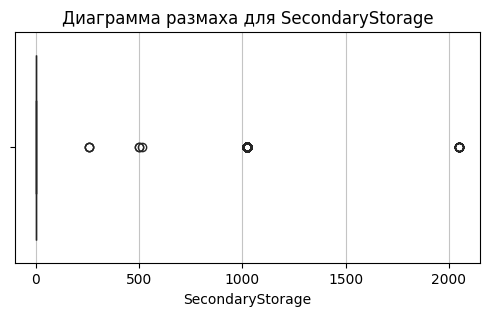

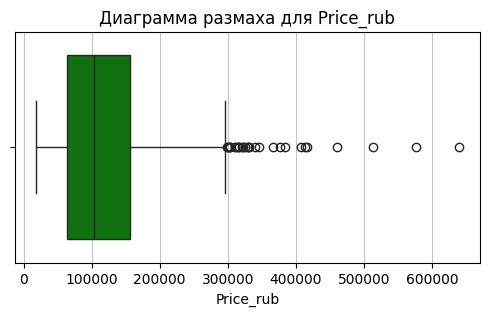

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

num_list = ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage', 'Price_rub']

for num in num_list:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[num], color='green')
    plt.title(f'Диаграмма размаха для {num}')
    plt.xlabel(num)
    plt.grid(axis='x', alpha=0.75)
    plt.show()

Выбросы из Price_rub и Ptice_euros понятны, так как всегда есть товары, выходящие из основной ценовой категории, а именно - более дорогие товары. Остальные параметры описывают лаптопы на любой вкус и цвет, поэтому очевидно, что некоторые характеристики могут разниться с привычными, поэтому я считаю, что выбросов как таковых нет.

In [48]:
df.isna().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


Пропущенных значений нет.

3.Построим графики зависимостей одной переменной от другой

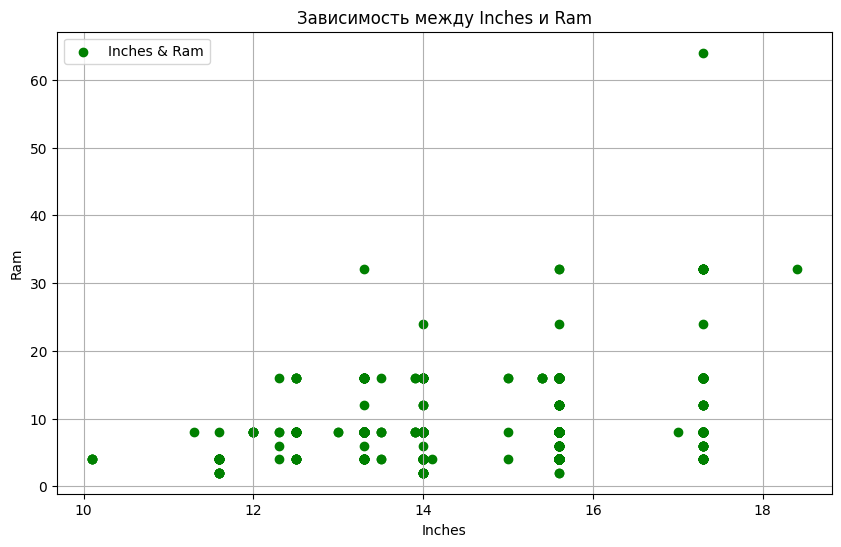

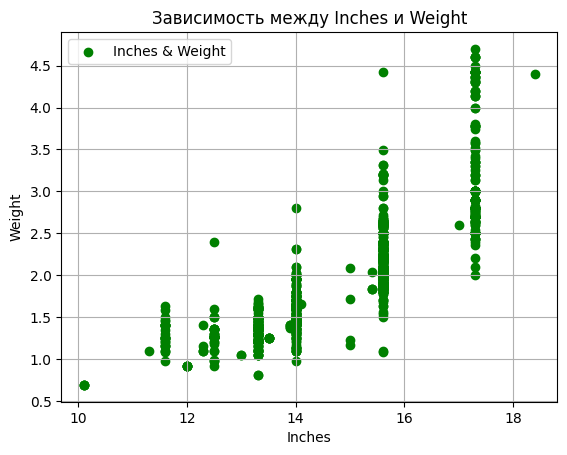

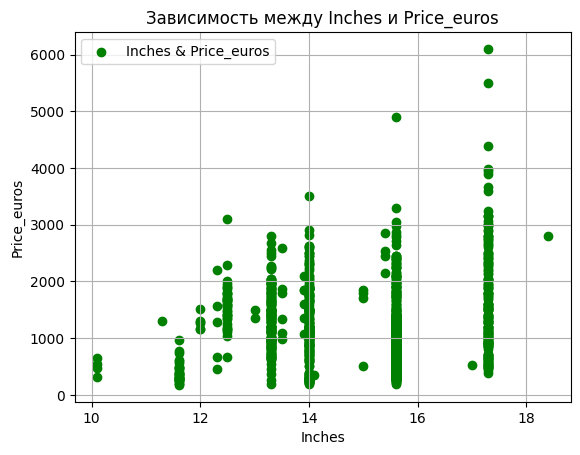

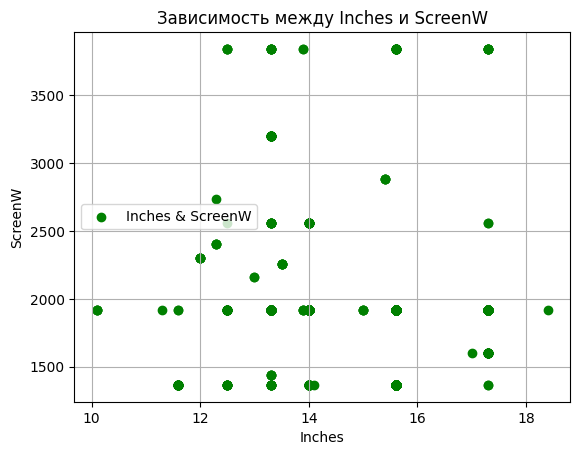

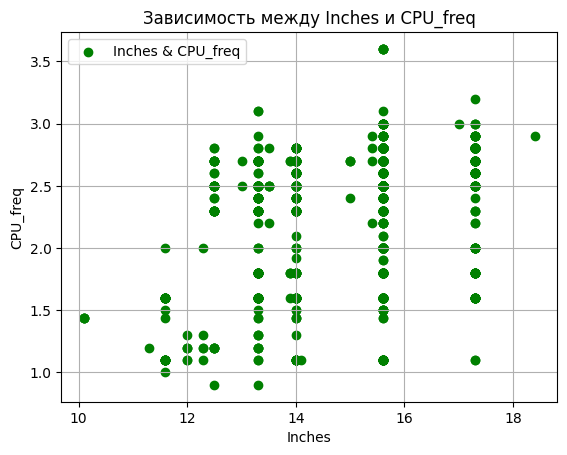

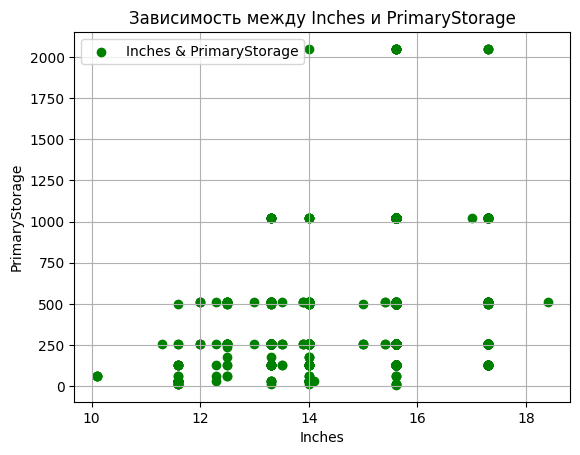

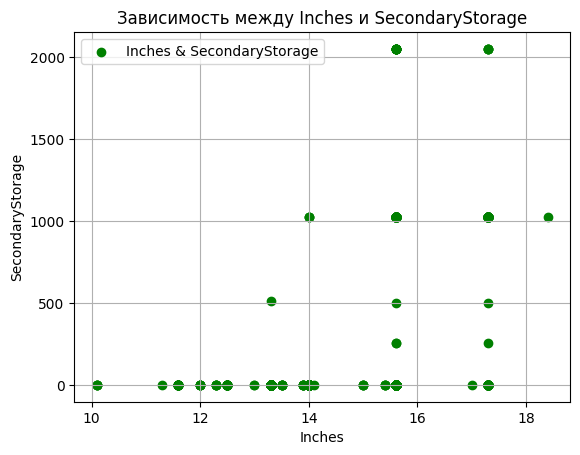

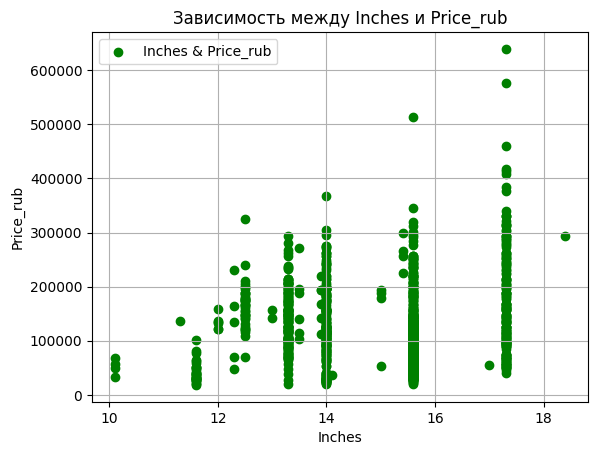

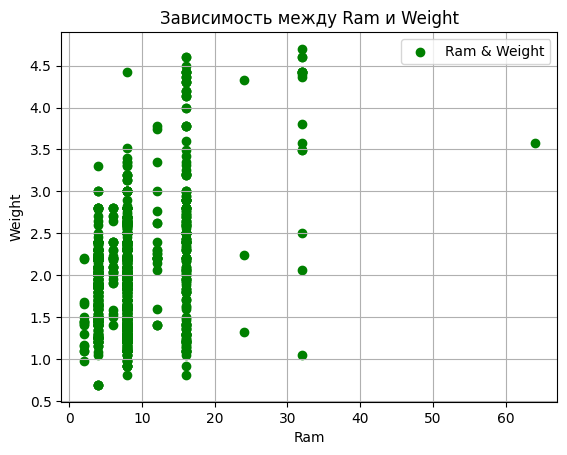

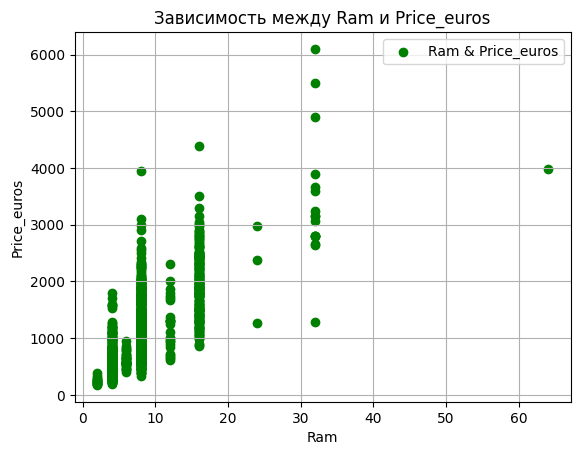

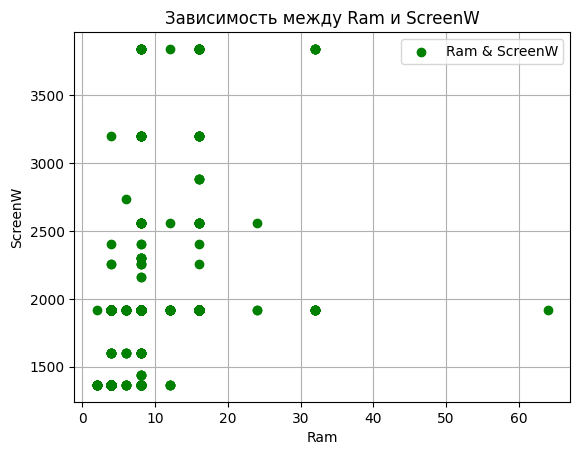

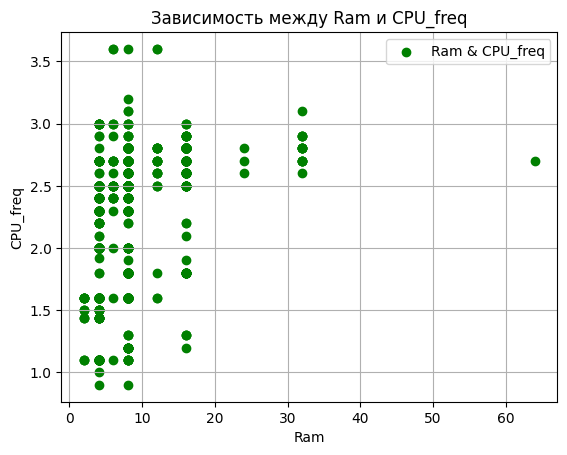

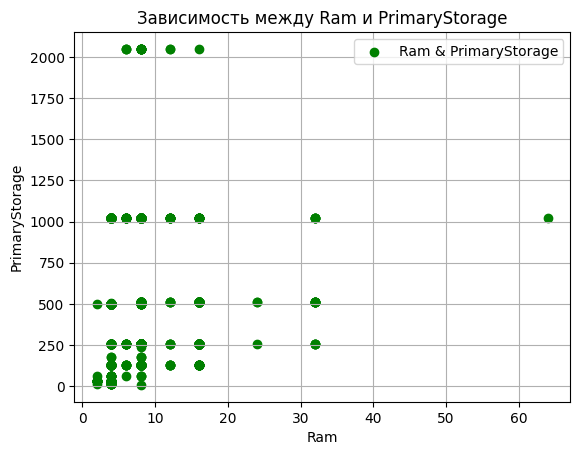

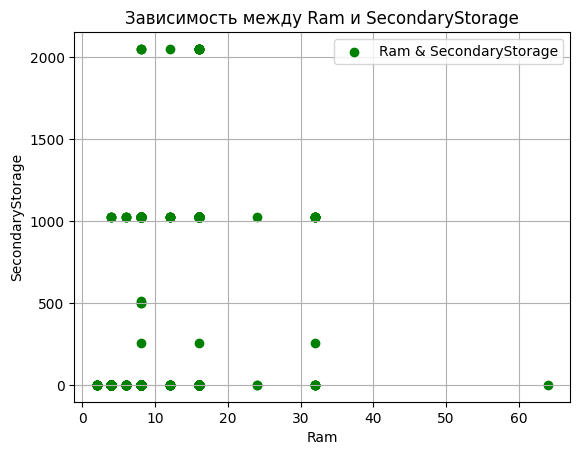

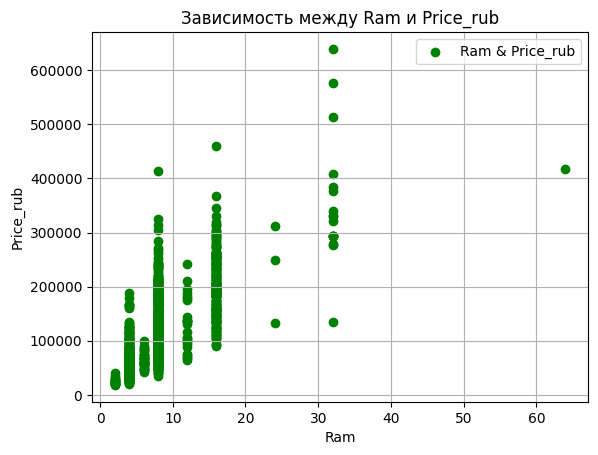

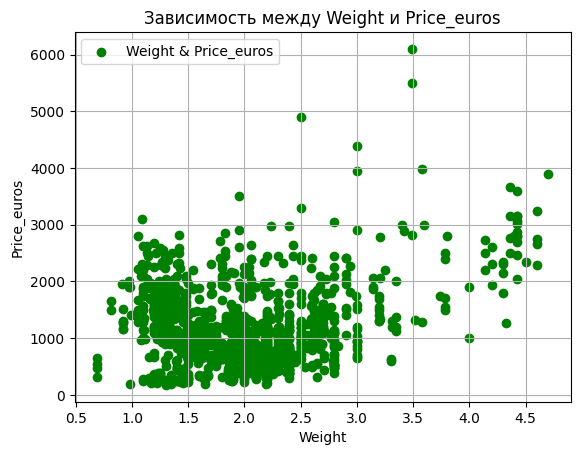

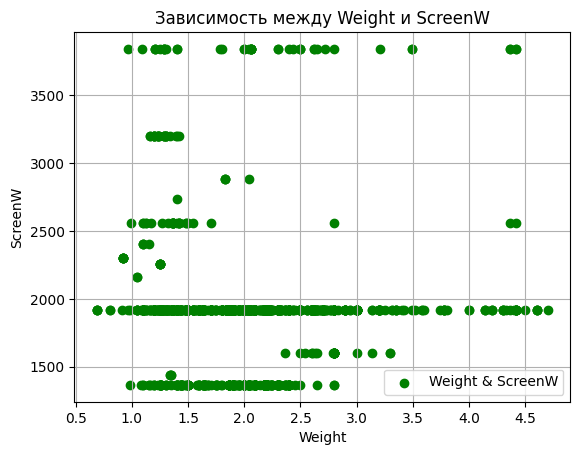

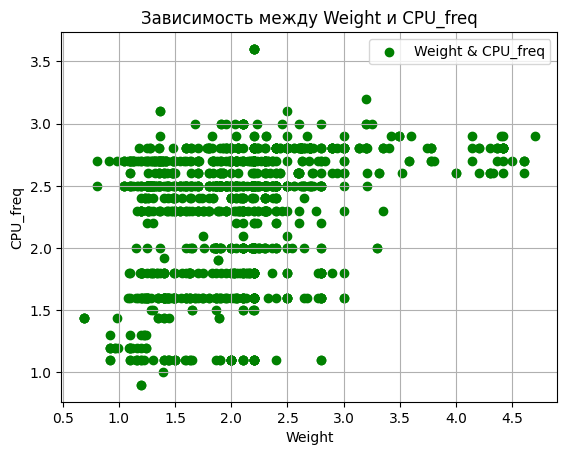

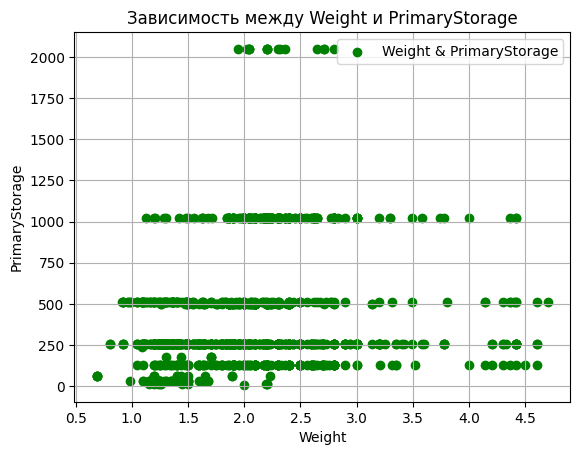

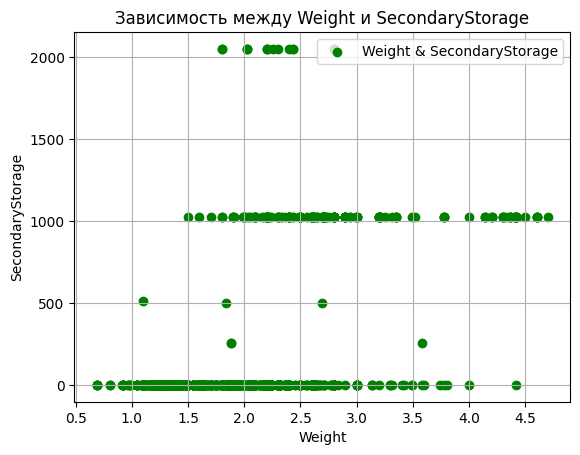

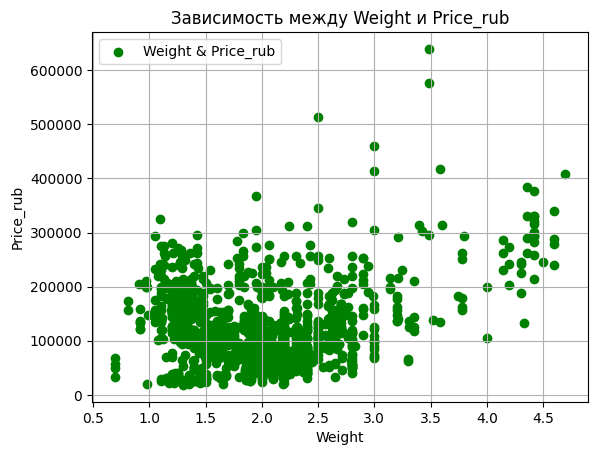

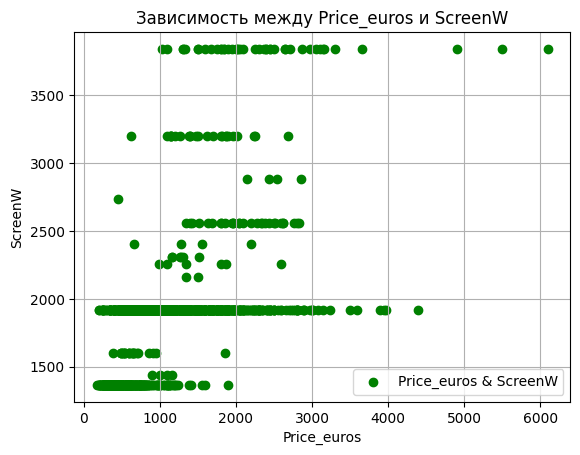

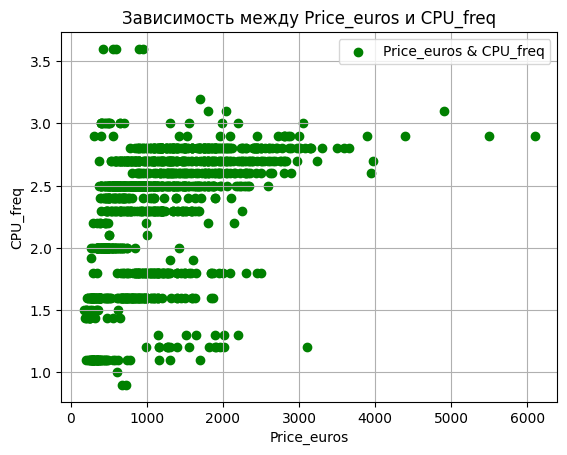

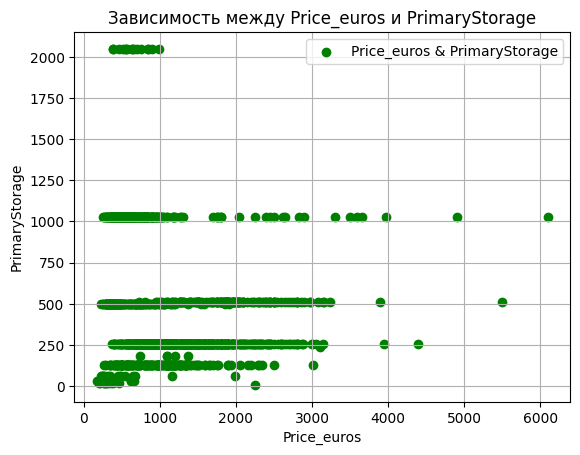

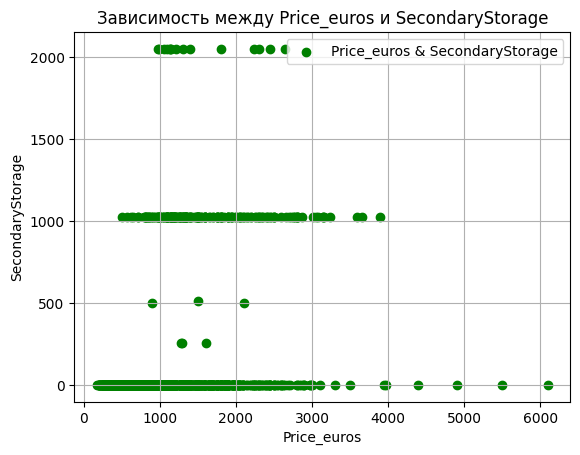

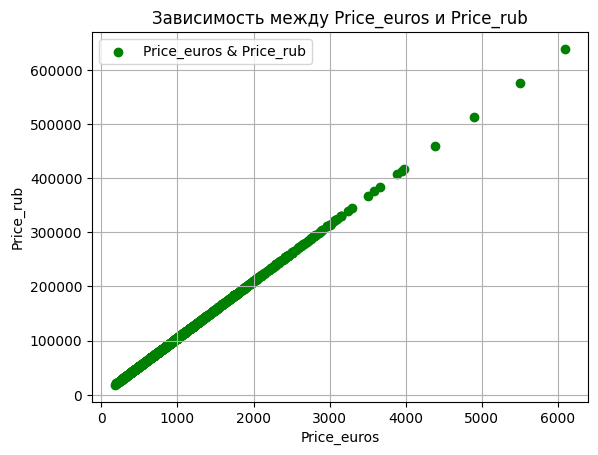

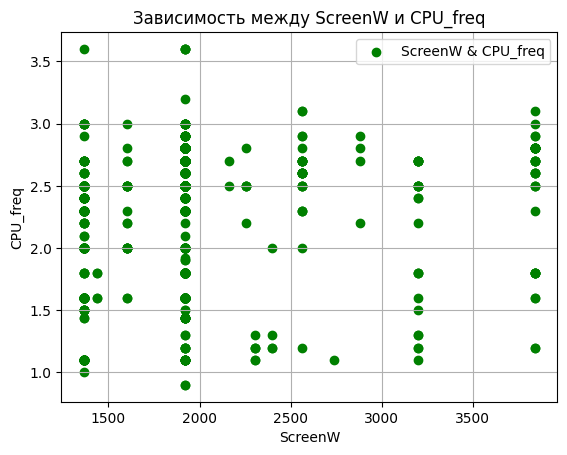

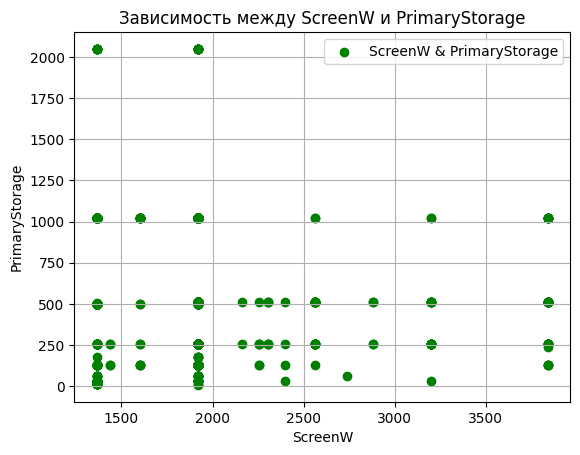

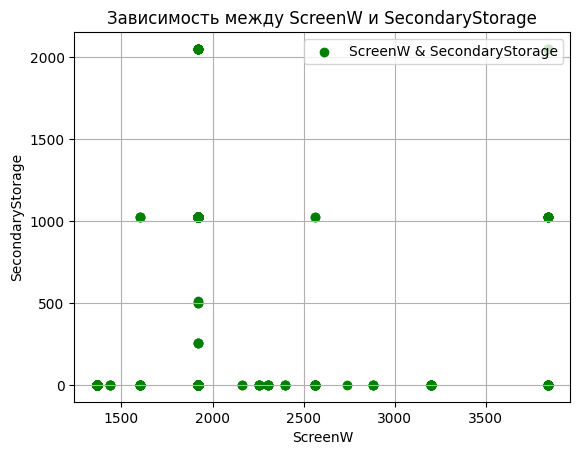

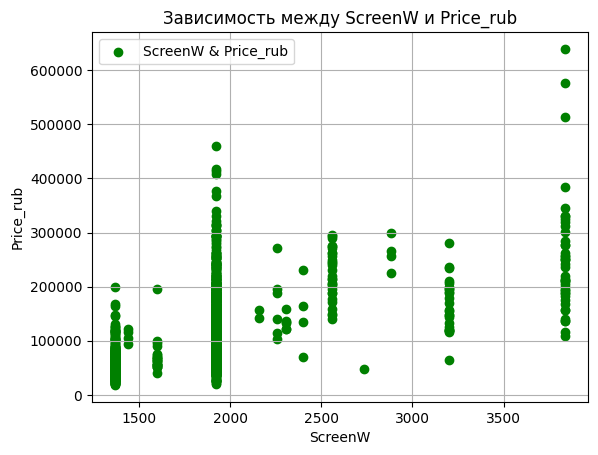

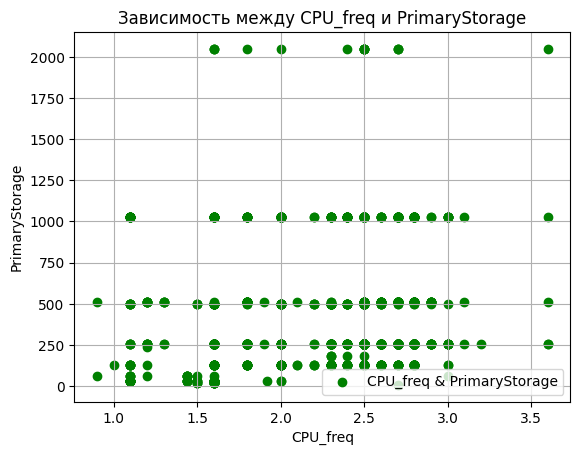

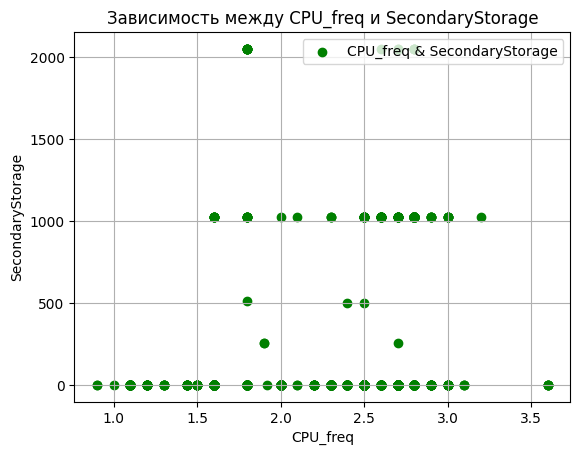

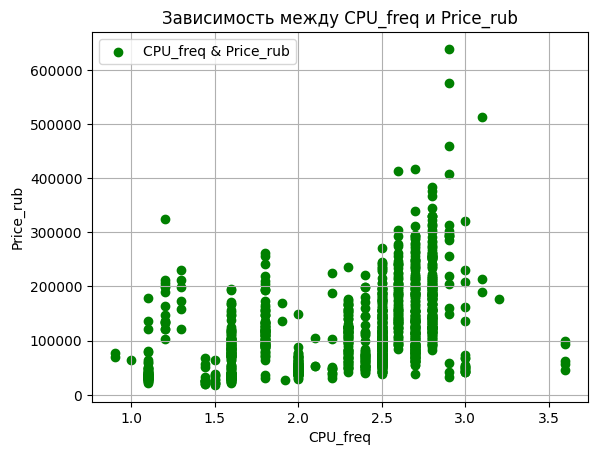

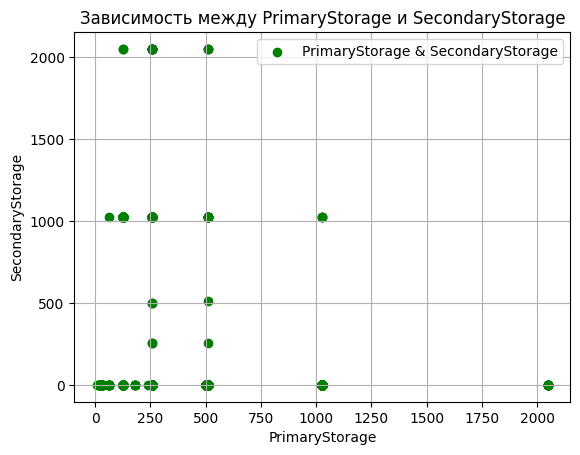

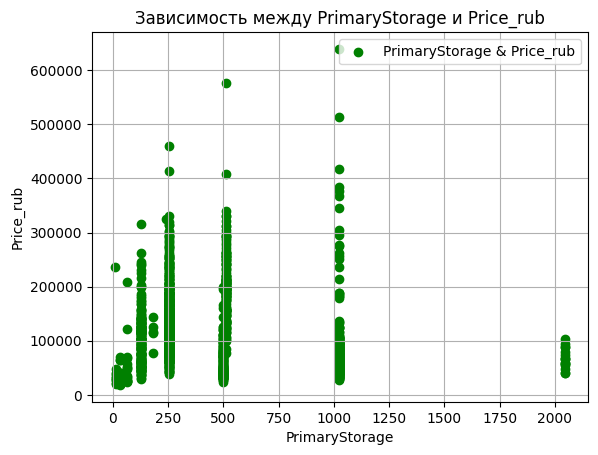

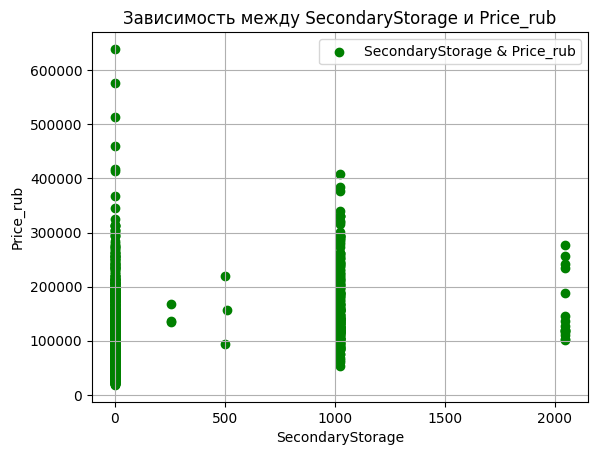

In [49]:
import itertools

plt.figure(figsize=(10, 6))
for (num1, num2) in itertools.combinations(num_list, 2):
    plt.scatter(df[num1], df[num2], label=f'{num1} & {num2}', color='green')
    plt.xlabel(num1)
    plt.ylabel(num2)
    plt.title(f'Зависимость между {num1} и {num2}')
    plt.legend()
    plt.grid()
    plt.show()

Среди числовых признаков можно выделить 2 группы исходя из ценовой категории.

In [50]:
def to_index(value, uniq_value):
    return uniq_value.index(value)

def categorical_to_numerical(dataframe, column):
    lists_uniq_values = sorted(list(set(dataframe[column])))
    dataframe[column] = dataframe[column].apply(lambda x: to_index(x, lists_uniq_values))

categorical_list = [x for x in df.columns if x not in num_list]

for feature in categorical_list:
    categorical_to_numerical(df, feature)

df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_rub
0,1,300,4,13.3,8,8,1.37,1339.69,3,2560,...,1,2.3,40,128,0,3,2,2,60,140479.8934
1,1,301,4,13.3,8,8,1.34,898.94,3,1440,...,1,1.8,40,128,0,0,2,2,53,94262.8484
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,1,2.5,46,256,0,3,2,2,55,60294.5000
3,1,300,4,15.4,16,8,1.83,2537.45,3,2880,...,1,2.7,54,512,0,3,2,0,80,266077.0070
4,1,300,4,13.3,8,8,1.37,1803.60,3,2560,...,1,3.1,40,256,0,3,2,2,61,189125.4960


4. Работа с методом KMeans

Чтобы применить метод локтя, были закодированы категориальные признаки в числовые.

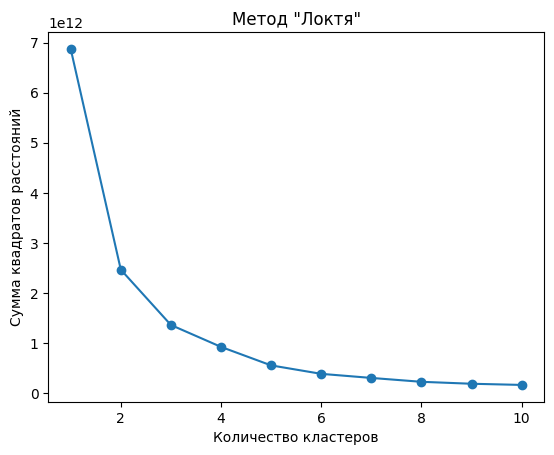

In [51]:
from sklearn.cluster import KMeans

sse_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[:-1])
    sse_list.append(kmeans.inertia_)

plt.plot(range(1, 11), sse_list, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

По методу локтя, оптимальный вариант - 2 кластера. Разделим на гендеры.

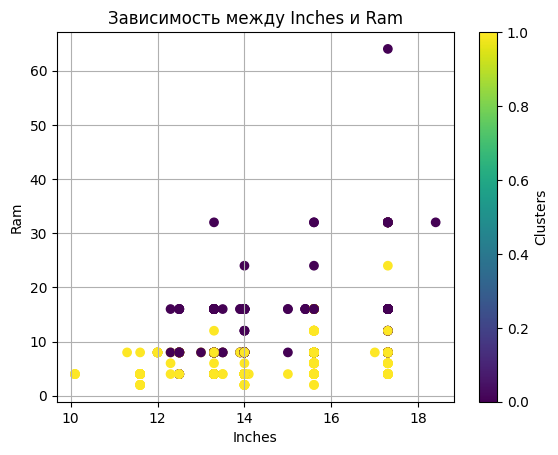

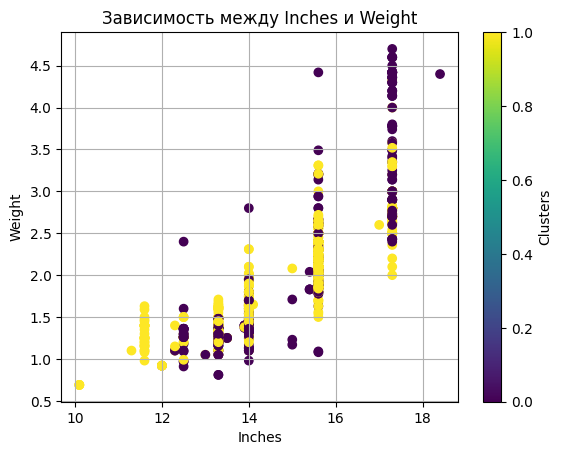

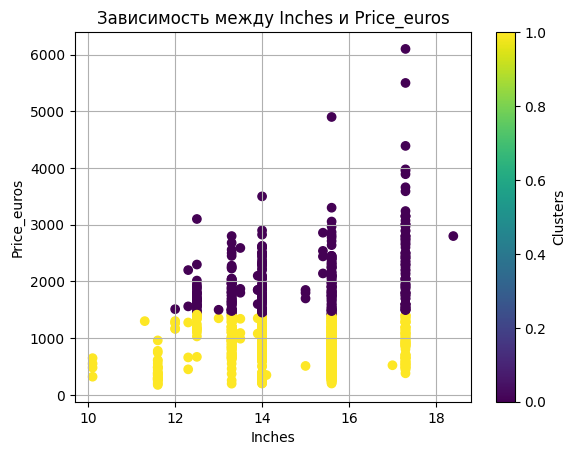

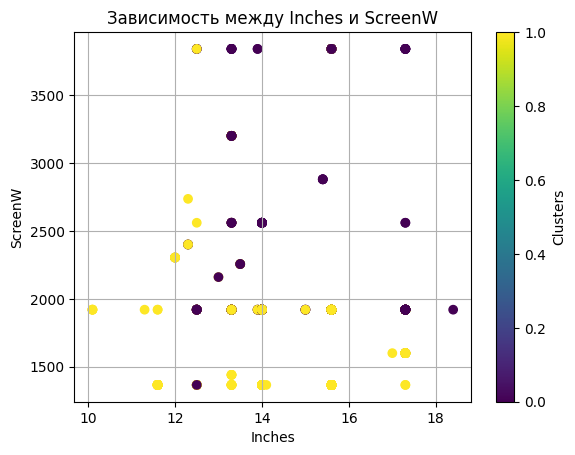

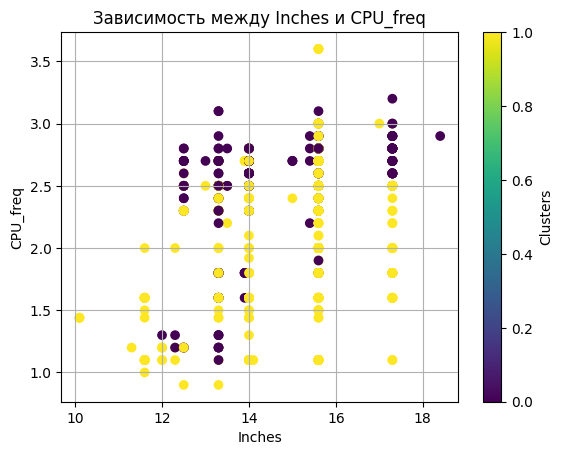

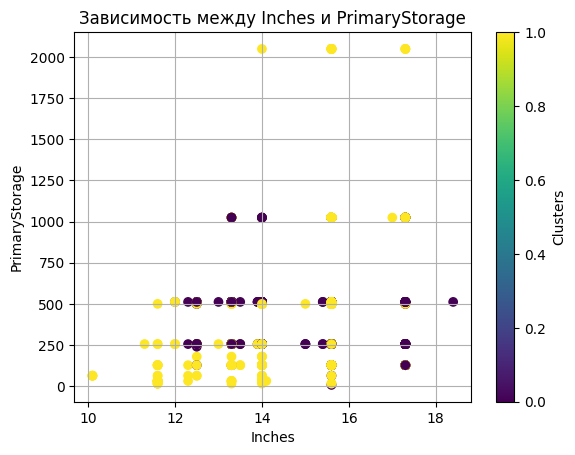

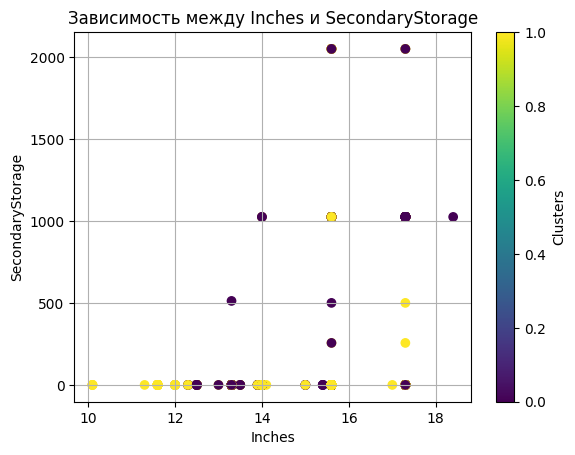

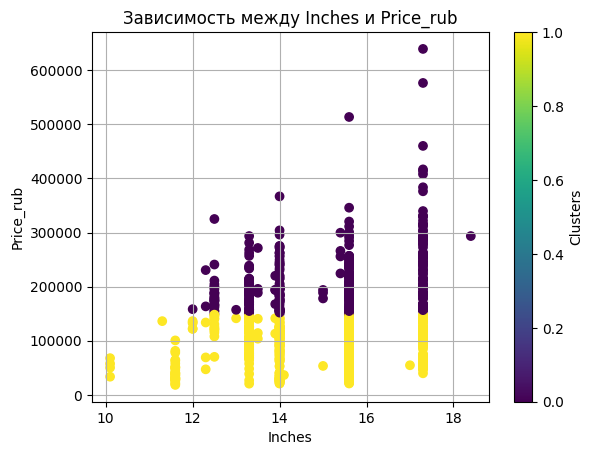

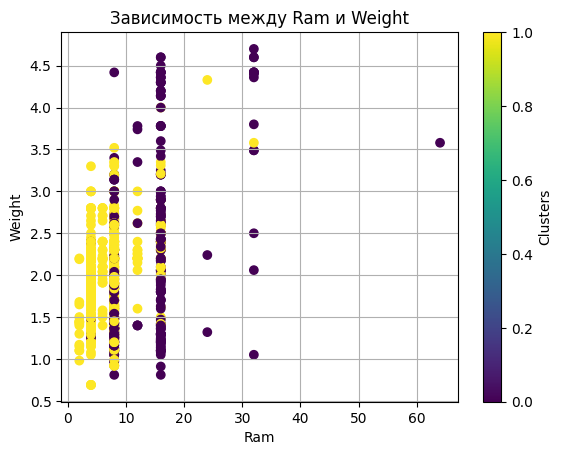

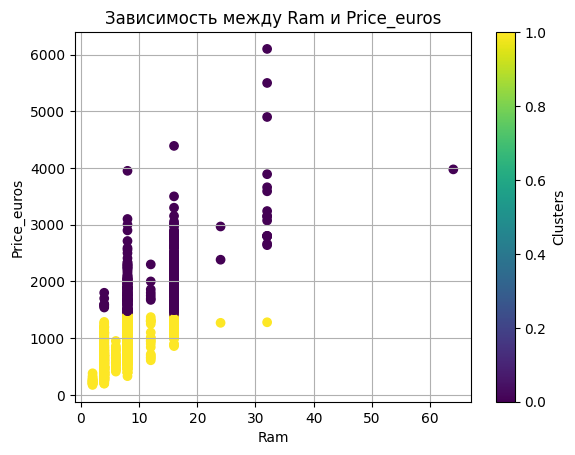

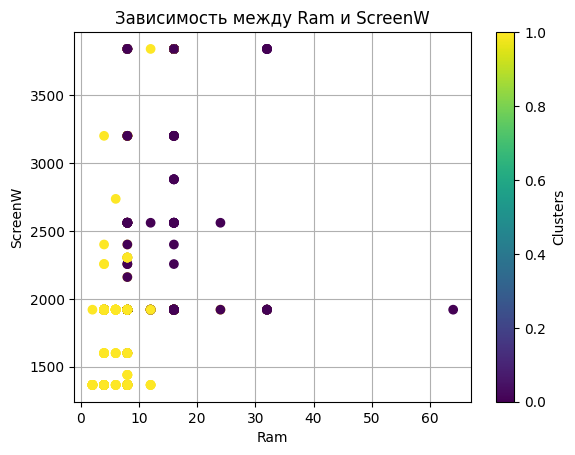

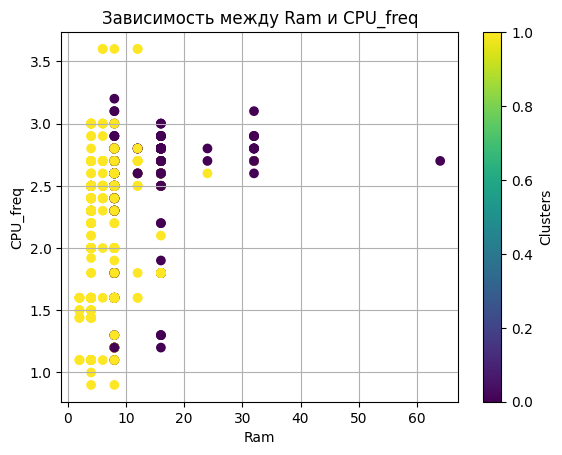

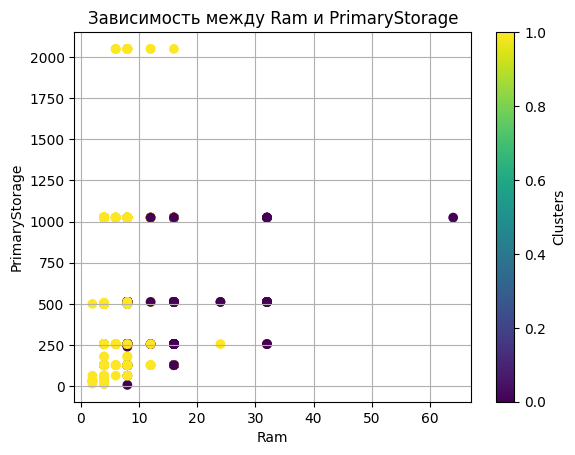

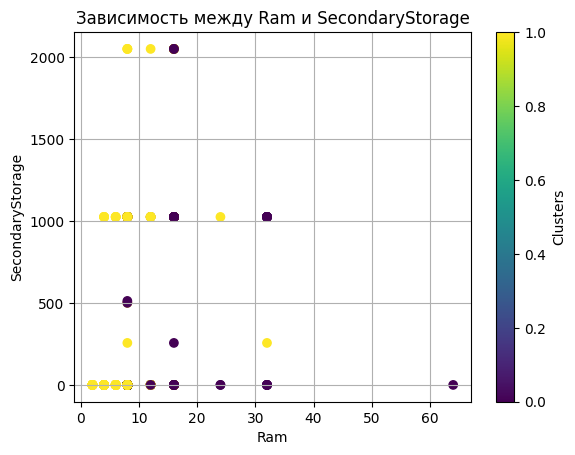

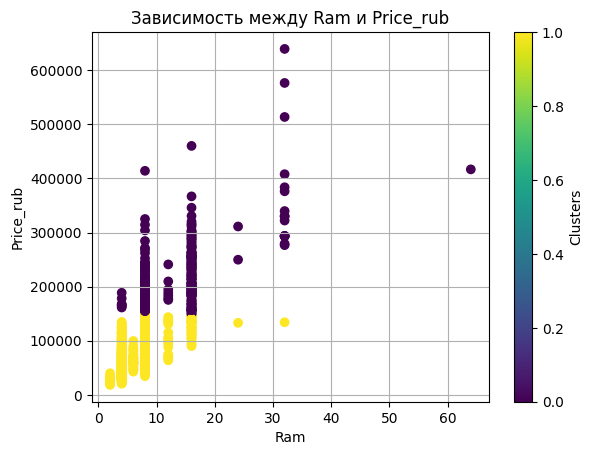

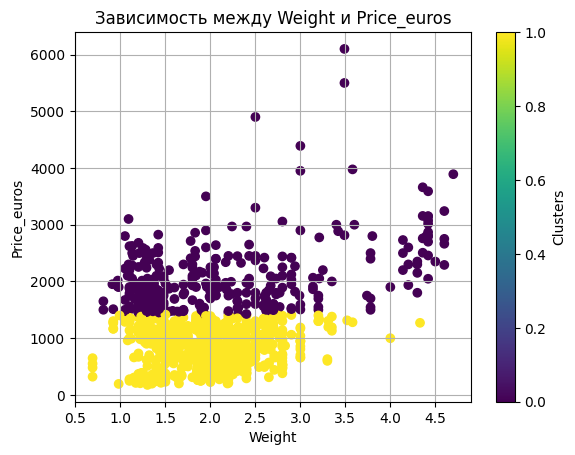

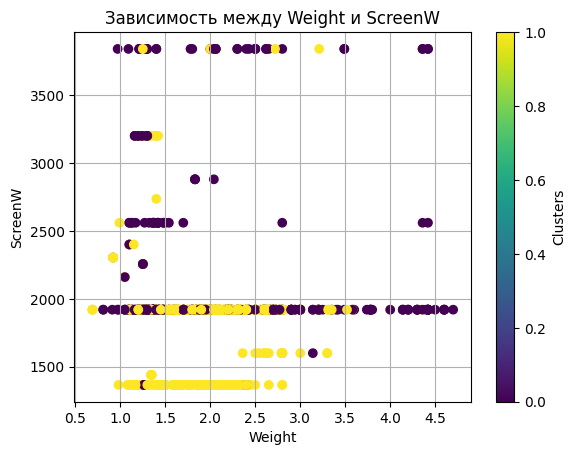

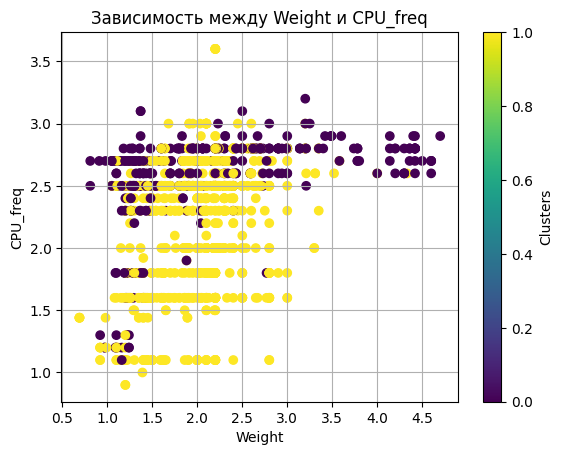

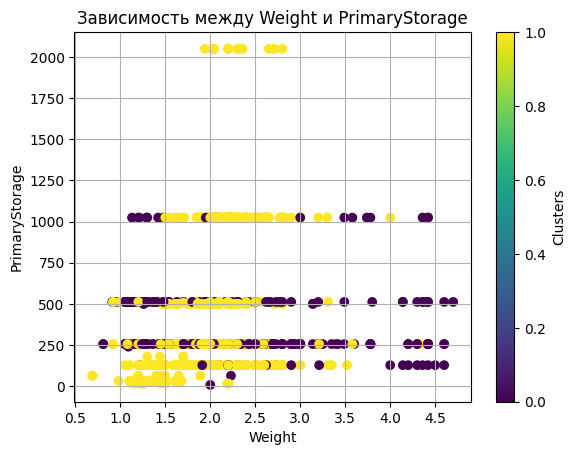

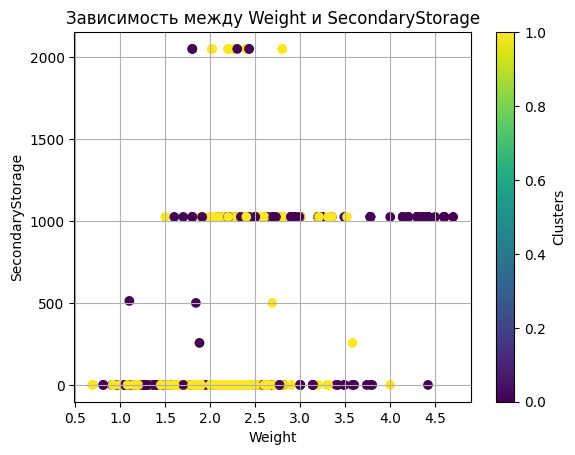

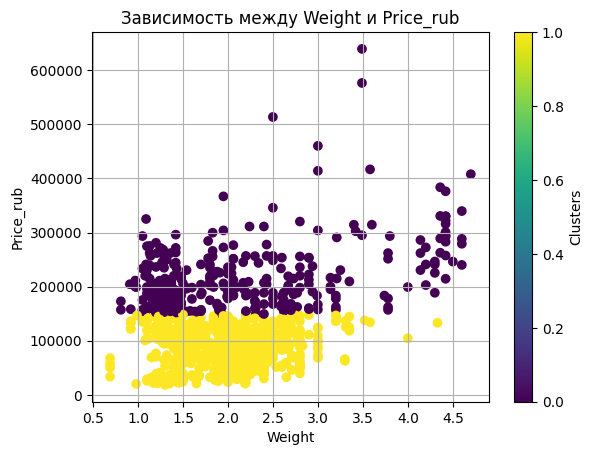

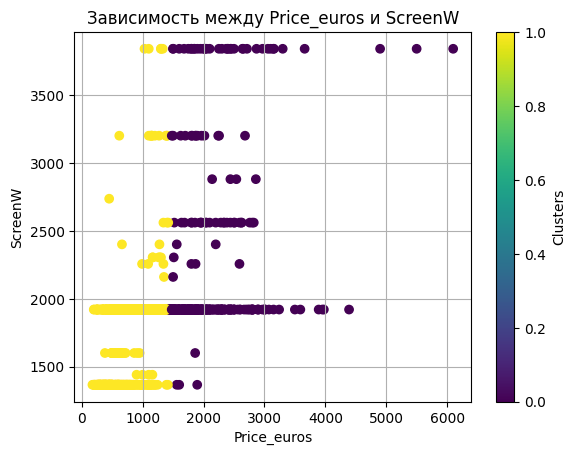

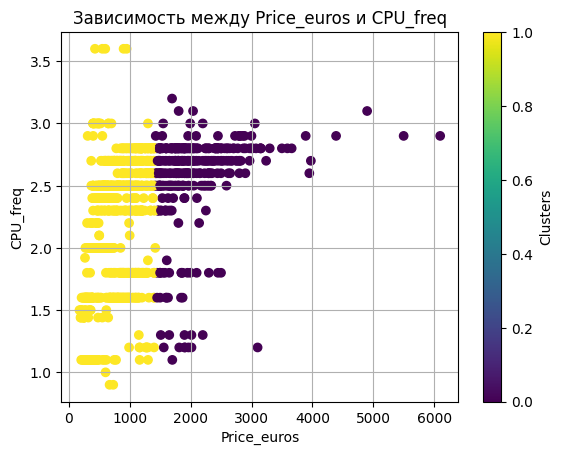

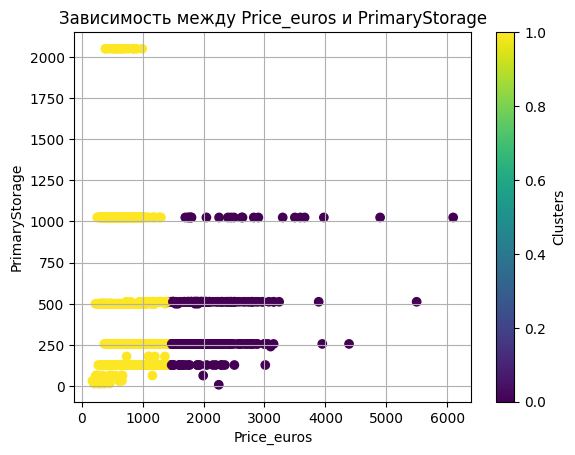

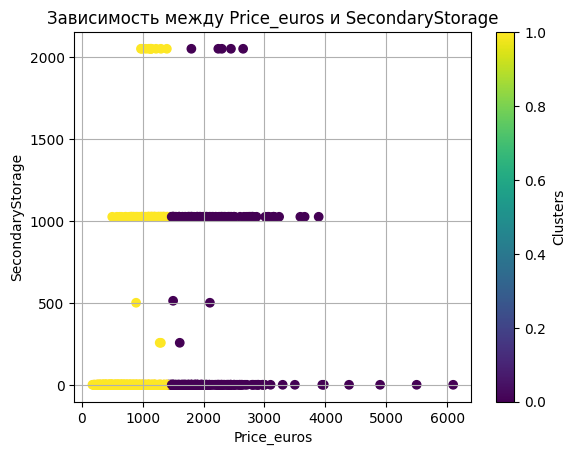

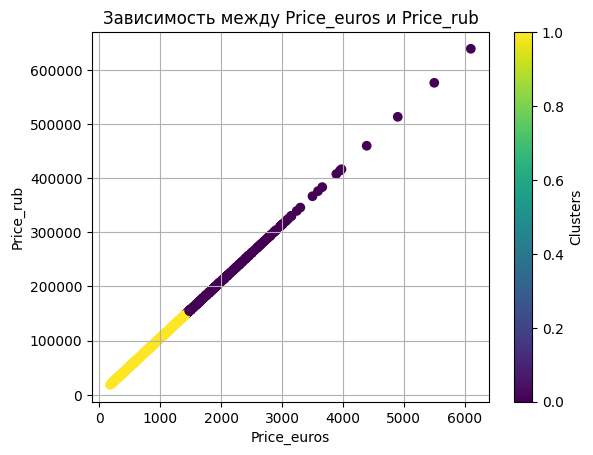

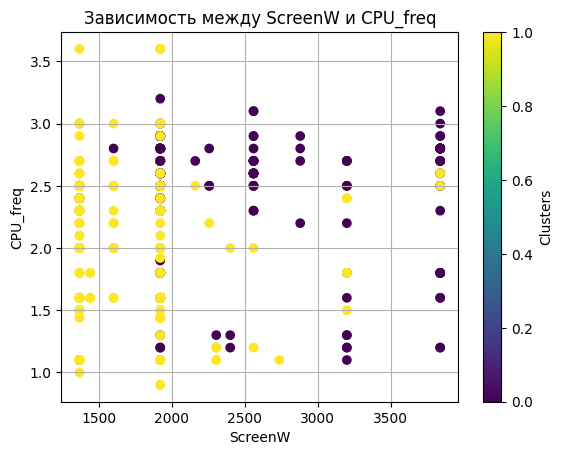

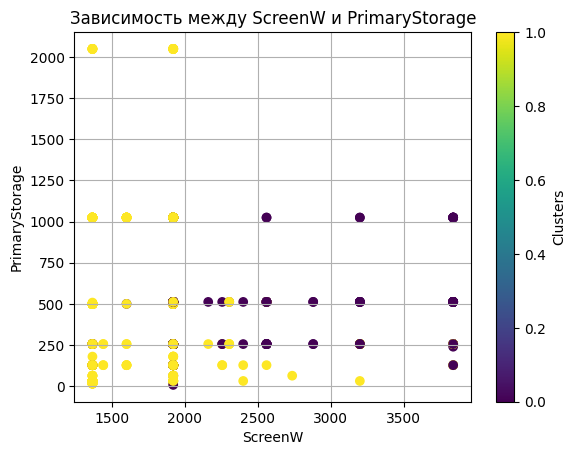

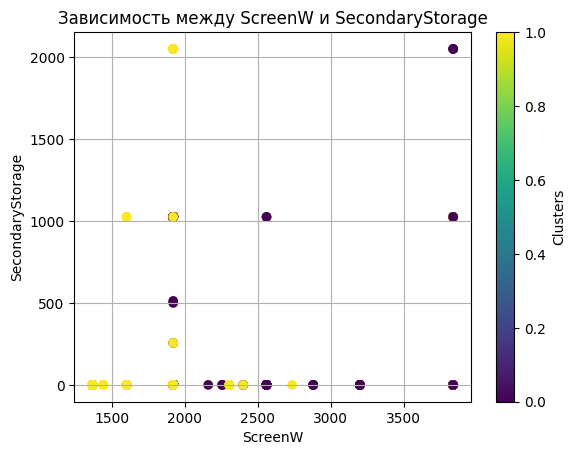

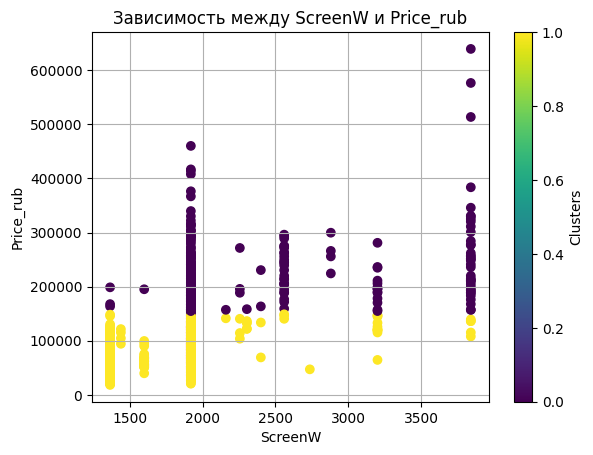

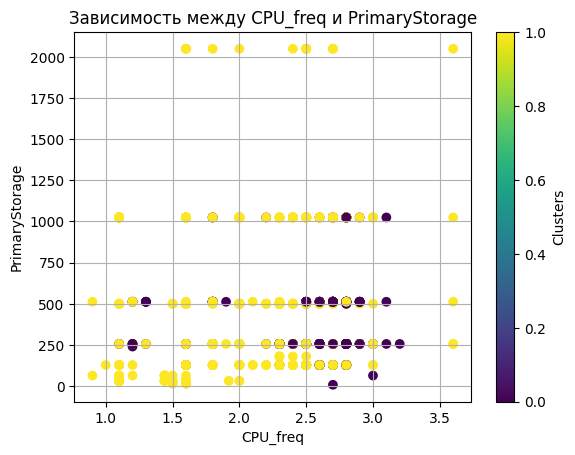

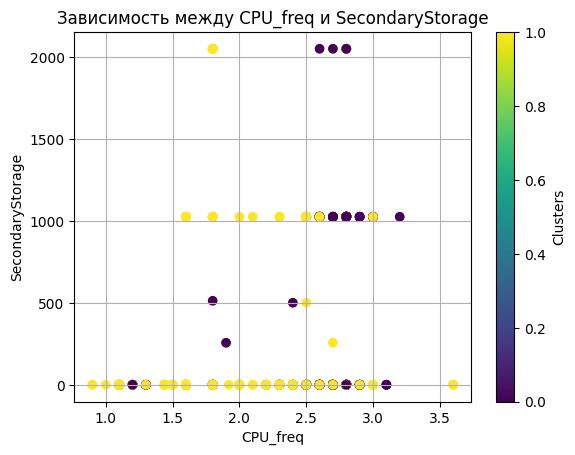

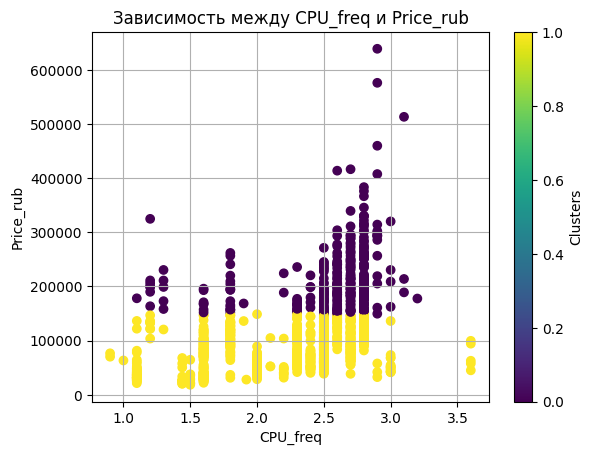

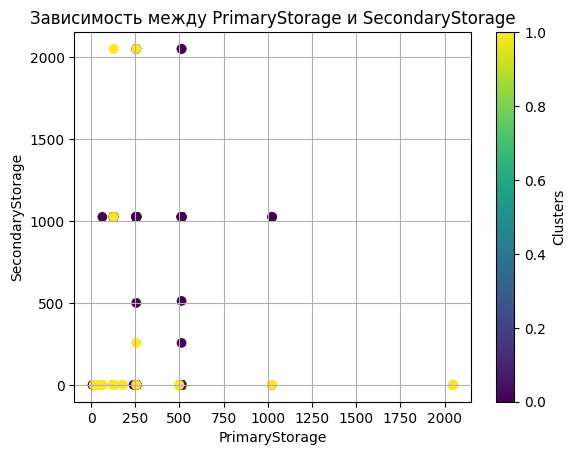

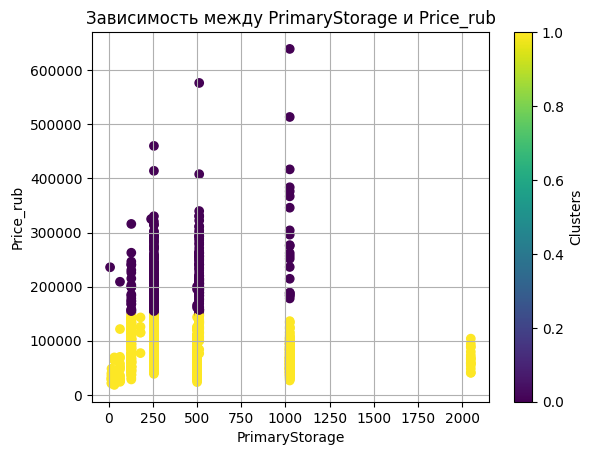

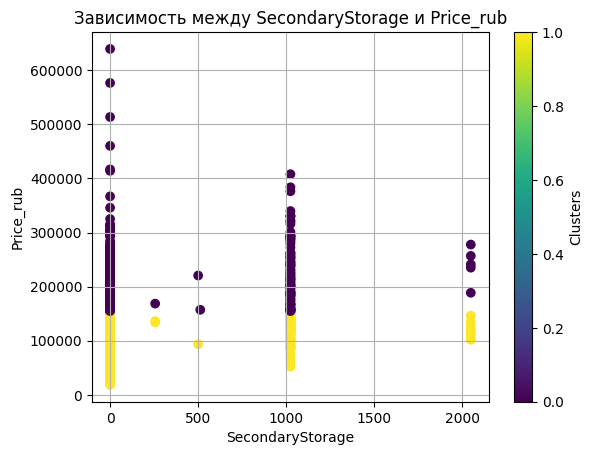

In [52]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

clusters = kmeans.predict(df)
df['Cluster'] = clusters

for (feature1, feature2) in itertools.combinations(num_list, 2):
    plt.scatter(df[feature1], df[feature2], c=df['Cluster'],
                cmap='viridis', label='Clusters')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Зависимость между {feature1} и {feature2}')
    plt.colorbar(label='Clusters')
    plt.grid()
    plt.show()

Разделение на 2 кластера дало следующий результат: данные распределились на 2 группы - более дорогие лаптопы и более дешевые.